# Machine Learning Engineer Nanodegree## 
## Capstone Project: Predicting sign of SPX daily returns

In [1]:
# Import all libraries
import pandas as pd
import numpy as np
from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Load SPX Historical data
SPX_data_dump = pd.read_csv('SPX Data.csv')
print ("SPX Historical Data has {} rows and {} features.".format(*SPX_data_dump.shape))
print ("A few sample rows are displayed below-")
display(SPX_data_dump.head(n=5))

SPX Historical Data has 1260 rows and 10 features.
A few sample rows are displayed below-


,Date,Open_SPX,High_SPX,Low_SPX,Close_SPX,Volume_SPX,Open_VIX,High_VIX,Low_VIX,Close_VIX
0,2012/12/06,1409.430054,1413.949951,1405.930054,1413.939941,3229700000,16.590000,16.850000,16.309999,16.580000
1,2012/12/07,1413.949951,1420.339966,1410.900024,1418.069946,3125160000,16.120001,16.650000,15.730000,15.900000
2,2012/12/10,1418.069946,1421.640015,1415.640015,1418.550049,2999430000,16.469999,16.469999,15.960000,16.049999
3,2012/12/11,1418.550049,1434.270020,1418.550049,1427.839966,3650230000,15.940000,16.010000,15.420000,15.570000
4,2012/12/12,1427.839966,1438.589966,1426.760010,1428.479980,3709050000,15.600000,16.090000,15.410000,15.950000


## Data Cleaning & Exploration

In [3]:
# Check for invalid values, and correct them
colnames_SPX = SPX_data_dump.columns

if SPX_data_dump.isnull().values.any():
#     If date is invalid, drop the row
    SPX_data_dump = SPX_data_dump[SPX_data_dump['Date'].notnull()]
    rows, cols = SPX_data_dump.shape
#     Fill the average of the past 5 trading days in case value is invalid.
    for col in range(2,cols+1):
        ndx_invalid = SPX_data_dump.iloc[:,col].isnull()
#         If any of the 1st 5 values is invalid, drop them
        if ndx_invalid[0:5].any():
            SPX_data_dump = SPX_data_dump[np.logical_not(ndx_invalid[0:5])]
        elif ndx_invalid.any():
            index_list = [i for i,x in enumerate(ndx_invalid) if x]
            index_list_prev5 = [i-5 for i,x in enumerate(ndx_invalid) if x]
            SPX_data_dump.iloc[index_list, col] = sum(SPX_data_dump.iloc[index_list_prev5, col])/5
    print('Invalid data values have been corrected.')
else:
    print('All the data values are valid.')

All the data values are valid.


In [4]:
rows, cols = SPX_data_dump.shape
print(rows, cols)

1260 10


In [5]:
# Sort the dataframe by Date
SPX_data_dump['Date'] = pd.to_datetime(SPX_data_dump.Date, format='%Y/%m/%d')
SPX_data_dump = SPX_data_dump.sort_values(by='Date', ascending=1)
SPX_data_dump.index = np.arange(rows)[::-1]
display(SPX_data_dump.head(n=5))

,Date,Open_SPX,High_SPX,Low_SPX,Close_SPX,Volume_SPX,Open_VIX,High_VIX,Low_VIX,Close_VIX
1259,2012-12-06,1409.430054,1413.949951,1405.930054,1413.939941,3229700000,16.590000,16.850000,16.309999,16.580000
1258,2012-12-07,1413.949951,1420.339966,1410.900024,1418.069946,3125160000,16.120001,16.650000,15.730000,15.900000
1257,2012-12-10,1418.069946,1421.640015,1415.640015,1418.550049,2999430000,16.469999,16.469999,15.960000,16.049999
1256,2012-12-11,1418.550049,1434.270020,1418.550049,1427.839966,3650230000,15.940000,16.010000,15.420000,15.570000
1255,2012-12-12,1427.839966,1438.589966,1426.760010,1428.479980,3709050000,15.600000,16.090000,15.410000,15.950000


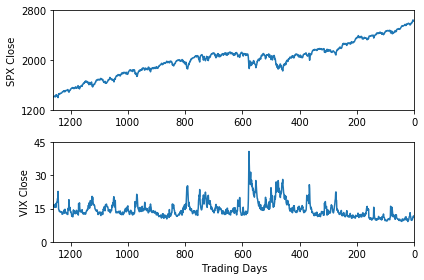

In [6]:
# Graph S&P 500 for all the data present
# 0 represents the latest data point, while 1259 is the earliest
f, axes = plt.subplots(2, 1)

axes[0].axis([rows,0,min(SPX_data_dump['Close_SPX']),max(SPX_data_dump['Close_SPX'])])
axes[0].plot(SPX_data_dump['Close_SPX'])
axes[0].set_ylabel('SPX Close')
axes[0].set_yticks([1200,2000,2800])

axes[1].axis([rows,0,min(SPX_data_dump['Close_VIX']),max(SPX_data_dump['Close_VIX'])])
axes[1].plot(SPX_data_dump['Close_VIX'])
axes[1].set_ylabel('VIX Close')
axes[1].set_yticks([0,15,30,45])

axes[1].set_xlabel('Trading Days')
plt.tight_layout()

## Engineering new Features

In [7]:
SPX_data_dump = SPX_data_dump.sort_index()
display(SPX_data_dump.head(n=5))

,Date,Open_SPX,High_SPX,Low_SPX,Close_SPX,Volume_SPX,Open_VIX,High_VIX,Low_VIX,Close_VIX
0,2017-12-06,2626.239990,2634.409912,2624.750000,2633.459961,1281124551,11.63,11.68,10.86,11.08
1,2017-12-05,2639.780029,2648.719971,2627.729980,2629.570068,3539040000,11.38,11.67,10.65,11.33
2,2017-12-04,2657.189941,2665.189941,2639.030029,2639.439941,4023150000,11.05,11.86,10.26,11.68
3,2017-12-01,2645.100098,2650.620117,2605.520020,2642.219971,3942320000,11.19,14.58,10.54,11.43
4,2017-11-30,2633.929932,2657.739990,2633.929932,2647.580078,4938490000,10.49,12.05,10.25,11.28


In [8]:
print(SPX_data_dump.columns.values)

['Date' 'Open_SPX' 'High_SPX' 'Low_SPX' 'Close_SPX' 'Volume_SPX' 'Open_VIX'
 'High_VIX' 'Low_VIX' 'Close_VIX']


In [9]:
# Create a new dataframe with all the new features

# Engineer the returns
SPX_data_modified = pd.DataFrame(data=SPX_data_dump)
SPX_data_modified['Trailing_1d_Return'] = SPX_data_dump['Close_SPX'].shift(-1)/SPX_data_dump['Close_SPX'].shift(-2) - 1
SPX_data_modified['Trailing_1d_Max_Move'] = SPX_data_dump['High_SPX'].shift(-1)/SPX_data_dump['Low_SPX'].shift(-1) - 1
SPX_data_modified['Trailing_1d_Gap_Return'] = SPX_data_dump['Open_SPX'].shift(-1)/SPX_data_dump['Close_SPX'].shift(-2) - 1
SPX_data_modified['Trailing_2d_Return'] = SPX_data_dump['Close_SPX'].shift(-1)/SPX_data_dump['Close_SPX'].shift(-3) - 1
SPX_data_modified['Trailing_3d_Return'] = SPX_data_dump['Close_SPX'].shift(-1)/SPX_data_dump['Close_SPX'].shift(-4) - 1
SPX_data_modified['Trailing_4d_Return'] = SPX_data_dump['Close_SPX'].shift(-1)/SPX_data_dump['Close_SPX'].shift(-5) - 1
SPX_data_modified['Trailing_5d_Return'] = SPX_data_dump['Close_SPX'].shift(-1)/SPX_data_dump['Close_SPX'].shift(-6) - 1
SPX_data_modified['Trailing_10d_Return'] = SPX_data_dump['Close_SPX'].shift(-1)/SPX_data_dump['Close_SPX'].shift(-11) - 1
SPX_data_modified['Trailing_22d_Return'] = SPX_data_dump['Close_SPX'].shift(-1)/SPX_data_dump['Close_SPX'].shift(-23) - 1
SPX_data_modified['Trailing_63d_Return'] = SPX_data_dump['Close_SPX'].shift(-1)/SPX_data_dump['Close_SPX'].shift(-64) - 1
SPX_data_modified['Trailing_252d_Return'] = SPX_data_dump['Close_SPX'].shift(-1)/SPX_data_dump['Close_SPX'].shift(-253) - 1
SPX_data_modified['Trailing_1d_Return_VIX'] = SPX_data_dump['Close_VIX'].shift(-1)/SPX_data_dump['Close_VIX'].shift(-2) - 1
SPX_data_modified['Trailing_1d_Max_Move_VIX'] = SPX_data_dump['High_VIX'].shift(-1)/SPX_data_dump['Low_VIX'].shift(-1) - 1
SPX_data_modified['Trailing_5d_Return_VIX'] = SPX_data_dump['Close_VIX'].shift(-1)/SPX_data_dump['Close_VIX'].shift(-6) - 1

# Engineer the trend indicators
close_index = np.where(SPX_data_dump.columns.values == 'Close_SPX')
volume_index = np.where(SPX_data_dump.columns.values == 'Volume_SPX')
temp_close_indicator = np.zeros(rows)
temp_volume_indicator = np.zeros(rows)

for i in np.arange(rows):
    if i <= rows - 21:
        close_5d_avg = sum(SPX_data_dump.iloc[(i+1):(i+6),int(close_index[0])])/5
        close_20d_avg = sum(SPX_data_dump.iloc[(i+1):(i+21),int(close_index[0])])/20
        if close_5d_avg > close_20d_avg:
            temp_close_indicator[i] = 1
        else:
            temp_close_indicator[i] = 0
    else:
        temp_close_indicator[i] = np.nan
    
    if i <= rows - 11:
        vol_10d_avg = sum(SPX_data_dump.iloc[(i+1):(i+11),int(volume_index[0])])/10
        if vol_10d_avg > SPX_data_dump.iloc[i+1,int(volume_index[0])]:
            temp_volume_indicator[i] = 1
        else:
            temp_volume_indicator[i] = 0
    else:
        temp_volume_indicator[i] = np.nan
        
SPX_data_modified['Is_MA5_above_MA20'] = temp_close_indicator
SPX_data_modified['Is_Trailing_1d_Vol_above_MA10_Vol'] = temp_volume_indicator

# Create label
open_index = np.where(SPX_data_dump.columns.values == 'Open_SPX')
a = np.zeros(rows)
for i in np.arange(rows):
    if SPX_data_dump.iloc[i,int(close_index[0])] > SPX_data_dump.iloc[i,int(open_index[0])]:
        a[i] = 1
    elif SPX_data_dump.iloc[i,int(close_index[0])] < SPX_data_dump.iloc[i,int(open_index[0])]:
        a[i] = 0    
    else:
        a[i] = np.nan

if any(np.isnan(a)):
    a_check_ind = [i for i,x in enumerate(np.isnan(a)) if x]
    for i in a_check_ind:
#         The 5 labels corresponding to the oldest dates don't have enough data points to take an average
        if i in np.arange(rows-5,rows,1):
            a[i] = np.nan
        else:
            a[i] = round(sum(a[(i+1):(i+6)])/5)

SPX_data_modified['Label'] = a

# Drop rows if any of the engineered features is invalid
if SPX_data_modified.isnull().values.any():
    SPX_data_modified = SPX_data_modified.dropna()
    print('{} rows have been dropped due to at least one engineered feature having invalid data.'.format(rows - SPX_data_modified.shape[0]))

display(SPX_data_modified.head(n=5))
rows_new, cols_new = SPX_data_modified.shape

253 rows have been dropped due to at least one engineered feature having invalid data.


,Date,Open_SPX,High_SPX,Low_SPX,Close_SPX,Volume_SPX,Open_VIX,High_VIX,Low_VIX,Close_VIX,...,Trailing_10d_Return,Trailing_22d_Return,Trailing_63d_Return,Trailing_252d_Return,Trailing_1d_Return_VIX,Trailing_1d_Max_Move_VIX,Trailing_5d_Return_VIX,Is_MA5_above_MA20,Is_Trailing_1d_Vol_above_MA10_Vol,Label
0,2017-12-06,2626.239990,2634.409912,2624.750000,2633.459961,1281124551,11.63,11.68,10.86,11.08,...,0.018369,0.019272,0.066529,0.192706,-0.029966,0.095775,0.129611,1.0,0.0,1.0
1,2017-12-05,2639.780029,2648.719971,2627.729980,2629.570068,3539040000,11.38,11.67,10.65,11.33,...,0.023495,0.023293,0.073882,0.204152,0.021872,0.155945,0.183384,1.0,0.0,0.0
2,2017-12-04,2657.189941,2665.189941,2639.030029,2639.439941,4023150000,11.05,11.86,10.26,11.68,...,0.021882,0.026001,0.066895,0.205898,0.013298,0.383302,0.182006,1.0,0.0,0.0
3,2017-12-01,2645.100098,2650.620117,2605.520020,2642.219971,3942320000,11.19,14.58,10.54,11.43,...,0.032348,0.029054,0.071179,0.204097,0.054206,0.175610,0.141700,1.0,0.0,0.0
4,2017-11-30,2633.929932,2657.739990,2633.929932,2647.580078,4938490000,10.49,12.05,10.25,11.28,...,0.018303,0.017435,0.068555,0.191145,0.066800,0.114169,0.099692,1.0,0.0,1.0


In [10]:
# Describe the dataset that would be used for training of models
display(SPX_data_modified.describe())

,Open_SPX,High_SPX,Low_SPX,Close_SPX,Volume_SPX,Open_VIX,High_VIX,Low_VIX,Close_VIX,Trailing_1d_Return,...,Trailing_10d_Return,Trailing_22d_Return,Trailing_63d_Return,Trailing_252d_Return,Trailing_1d_Return_VIX,Trailing_1d_Max_Move_VIX,Trailing_5d_Return_VIX,Is_MA5_above_MA20,Is_Trailing_1d_Vol_above_MA10_Vol,Label
count,1007.000000,1007.000000,1007.000000,1007.000000,1.007000e+03,1007.000000,1007.000000,1007.00000,1007.000000,1007.000000,...,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000
mean,2119.581836,2128.078819,2110.290448,2120.067844,3.578009e+09,14.591470,15.398352,13.88146,14.509851,0.000414,...,0.003976,0.008668,0.025246,0.109754,0.002730,0.104367,0.012358,0.641509,0.540218,0.528302
std,203.564221,201.960388,205.402709,203.788063,7.006715e+08,3.818355,4.362816,3.45737,3.878825,0.007647,...,0.021532,0.029552,0.040427,0.085228,0.079916,0.065659,0.182587,0.479795,0.498627,0.499446
min,1743.819946,1755.790039,1737.920044,1741.890015,1.281125e+09,9.230000,9.520000,8.56000,9.140000,-0.039414,...,-0.103864,-0.103103,-0.121361,-0.115759,-0.259057,0.027692,-0.426630,0.000000,0.000000,0.000000
25%,1977.690002,1985.454956,1968.880005,1978.279968,3.164345e+09,12.030000,12.580000,11.55500,11.990000,-0.002768,...,-0.006465,-0.006519,0.007828,0.046023,-0.040619,0.064586,-0.089208,0.000000,0.000000,0.000000
50%,2083.100098,2093.000000,2073.649902,2082.419922,3.486910e+09,13.700000,14.350000,13.09000,13.630000,0.000367,...,0.004842,0.010867,0.030593,0.127883,-0.004528,0.088867,-0.011140,1.000000,1.000000,1.000000
75%,2210.464966,2227.864990,2207.599976,2226.090088,3.896030e+09,15.905000,16.675000,15.12000,15.770000,0.004441,...,0.016340,0.025598,0.050070,0.173678,0.038286,0.121102,0.078661,1.000000,1.000000,1.000000
max,2657.189941,2665.189941,2639.030029,2647.580078,7.597450e+09,31.910000,53.290001,29.91000,40.740002,0.039034,...,0.075779,0.110842,0.130730,0.312771,0.493333,0.901177,2.129032,1.000000,1.000000,1.000000


The above data description shows that SPX closed above its open 52.8% of the time.

In [11]:
# Output the dataset with the engineered features
SPX_data_modified.to_csv('SPX_Data_New_Features.csv')

The new dataset with the engineered features needs to be separated clearly into features and labels

In [12]:
X = SPX_data_modified.iloc[:,0:(cols_new-1)]
Y = SPX_data_modified.iloc[:,(cols_new-1)]
print('The features are-')
display(X.head(n=5))
print('The expected labels are-')
display(Y.head(n=5))

The features are-


,Date,Open_SPX,High_SPX,Low_SPX,Close_SPX,Volume_SPX,Open_VIX,High_VIX,Low_VIX,Close_VIX,...,Trailing_5d_Return,Trailing_10d_Return,Trailing_22d_Return,Trailing_63d_Return,Trailing_252d_Return,Trailing_1d_Return_VIX,Trailing_1d_Max_Move_VIX,Trailing_5d_Return_VIX,Is_MA5_above_MA20,Is_Trailing_1d_Vol_above_MA10_Vol
0,2017-12-06,2626.239990,2634.409912,2624.750000,2633.459961,1281124551,11.63,11.68,10.86,11.08,...,0.000963,0.018369,0.019272,0.066529,0.192706,-0.029966,0.095775,0.129611,1.0,0.0
1,2017-12-05,2639.780029,2648.719971,2627.729980,2629.570068,3539040000,11.38,11.67,10.65,11.33,...,0.014615,0.023495,0.023293,0.073882,0.204152,0.021872,0.155945,0.183384,1.0,0.0
2,2017-12-04,2657.189941,2665.189941,2639.030029,2639.439941,4023150000,11.05,11.86,10.26,11.68,...,0.015293,0.021882,0.026001,0.066895,0.205898,0.013298,0.383302,0.182006,1.0,0.0
3,2017-12-01,2645.100098,2650.620117,2605.520020,2642.219971,3942320000,11.19,14.58,10.54,11.43,...,0.019445,0.032348,0.029054,0.071179,0.204097,0.054206,0.175610,0.141700,1.0,0.0
4,2017-11-30,2633.929932,2657.739990,2633.929932,2647.580078,4938490000,10.49,12.05,10.25,11.28,...,0.010404,0.018303,0.017435,0.068555,0.191145,0.066800,0.114169,0.099692,1.0,0.0


The expected labels are-


0    1.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: Label, dtype: float64

In [13]:
# Check if the splitting is done correctly
a = pd.concat([X,Y], axis=1)
if pd.DataFrame.equals(a,SPX_data_modified):
    print('The splitting of the labels has been done correctly.')
else:
    print('The splitting of the labels has NOT been done correctly. Please check again!')

The splitting of the labels has been done correctly.


The dataset needs to be split into training, cross-validation and test sets. Care needs to be taken that look-ahead bias does not creep in while doing this. To ensure this, sequential splitting will work.

In [14]:
# Split the dataset into training, cross-validation and testing sets

# The split is supposed to be done sequentially into training, cross-validation and test sets in the ratio 60%-20%-20%
n = round(0.2*rows_new)
X_test = X.iloc[0:n,:]
Y_test = Y[0:n]

X_cv = X.iloc[n:(2*n+1),:]
Y_cv = Y[n:(2*n+1)]

X_train = X.iloc[(2*n+1):,:]
Y_train = Y[(2*n+1):]

print(X_test.shape[0], X_cv.shape[0], X_train.shape[0])

201 202 604


In [15]:
# Check if the splitting has been done correctly
a = pd.concat([Y_test,Y_cv,Y_train])
if pd.DataFrame.equals(a,Y):
    print('The splitting of the labels has been done correctly.')
else:
    print('The splitting of the labels has NOT been done correctly. Please check again!')

b = pd.concat([X_test,X_cv,X_train])
if pd.DataFrame.equals(b,X):
    print('The splitting of the features has been done correctly.')
else:
    print('The splitting of the features has NOT been done correctly. Please check again!')

The splitting of the labels has been done correctly.
The splitting of the features has been done correctly.


## Training models on the dataset

The benchmark chosen is the buy and hold strategy. That translates to predicting 1 on all the days. The below snippet will copute the accuracy & F1 scores, and the PnL associated with the benchmark. The PnL would be calculated as buying at the open of the oldest date, and selling at the close of the newest date.

An XIRR function should be implemented to allow for the comparison of benchmark PnLs against that of the models. The following was taken from https://github.com/peliot/XIRR-and-XNPV/blob/master/financial.py

In [16]:
# XIRR function in python
import datetime
from scipy import optimize

def xnpv(rate,cashflows):
    chron_order = sorted(cashflows, key = lambda x: x[0])
    t0 = pd.to_datetime(chron_order[0][0], format='%Y/%m/%d') #t0 is the date of the first cash flow
    return sum([cf/(1+rate)**((pd.to_datetime(t, format='%Y/%m/%d')-t0).days/365.0) for (t,cf) in chron_order])

def xirr(cashflows,guess=0.1):
    return optimize.newton(lambda r: xnpv(r,cashflows),guess)

# Dummy calculations to test the function
cashflows = ('2016/12/26',-5),('2016/12/26',-5),('2017/12/26',16)
print(xirr(cashflows))

0.6000000000000002


Do all the benchmark calculations below to allow for ease of comparison later on.

In [17]:
from sklearn.metrics import f1_score, accuracy_score
close_index = np.where(SPX_data_modified.columns.values == 'Close_SPX')
open_index = np.where(SPX_data_modified.columns.values == 'Open_SPX')
# Show benchmark scores on the different sets against which the models would be compared
benchmark_Y_pred_train = np.empty(Y_train.shape[0])
benchmark_Y_pred_train.fill(1)
cashflows_train = (X_train.iloc[0,0],X_train.iloc[0,int(close_index[0])]),\
                  (X_train.iloc[X_train.shape[0]-1,0],-X_train.iloc[X_train.shape[0]-1,int(open_index[0])])
print('The accuracy score of the benchmark on the training set is {:,.4f}'.\
      format(accuracy_score(Y_train, benchmark_Y_pred_train)))
print('The F1 score of the benchmark on the training set is {:,.4f}'.format(f1_score(Y_train, benchmark_Y_pred_train)))
print('The XIRR of the benchmark on the training set is {:,.2f}%'.format(100*xirr(cashflows_train)))

benchmark_Y_pred_cv = np.empty(Y_cv.shape[0])
benchmark_Y_pred_cv.fill(1)
cashflows_cv = (X_cv.iloc[0,0],X_cv.iloc[0,int(close_index[0])]),\
               (X_cv.iloc[X_cv.shape[0]-1,0],-X_cv.iloc[X_cv.shape[0]-1,int(open_index[0])])
print('\nThe accuracy score of the benchmark on the cross-validation set is {:,.4f}'.\
      format(accuracy_score(Y_cv, benchmark_Y_pred_cv)))
print('The F1 score of the benchmark on the cross-validation set is {:,.4f}'.format(f1_score(Y_cv, benchmark_Y_pred_cv)))
print('The XIRR of the benchmark on the cross-validation set is {:,.2f}%'.format(100*xirr(cashflows_cv)))

benchmark_Y_pred_test = np.empty(Y_test.shape[0])
benchmark_Y_pred_test.fill(1)
cashflows_test = (X_test.iloc[0,0],X_test.iloc[0,int(close_index[0])]),\
                 (X_test.iloc[X_test.shape[0]-1,0],-X_test.iloc[X_test.shape[0]-1,int(open_index[0])])
print('\nThe accuracy score of the benchmark on the test set is {:,.4f}'.format(accuracy_score(Y_test, benchmark_Y_pred_test)))
print('The F1 score of the benchmark on the test set is {:,.4f}'.format(f1_score(Y_test, benchmark_Y_pred_test)))
print('The XIRR of the benchmark on the test set is {:,.2f}%'.format(100*xirr(cashflows_test)))

The accuracy score of the benchmark on the training set is 0.5265
The F1 score of the benchmark on the training set is 0.6898
The XIRR of the benchmark on the training set is 5.70%

The accuracy score of the benchmark on the cross-validation set is 0.5347
The F1 score of the benchmark on the cross-validation set is 0.6968
The XIRR of the benchmark on the cross-validation set is 18.77%

The accuracy score of the benchmark on the test set is 0.5274
The F1 score of the benchmark on the test set is 0.6906
The XIRR of the benchmark on the test set is 14.89%


In [18]:
import time
def train_classifier(clf, X_train, Y_train):
    start = time.clock()
    clf.fit(X_train, Y_train)
    end = time.clock()
    print('The classifier took {:,.4f} sec to train'.format(end - start))

def classifier_predict(clf, X_train):
    start = time.clock()
    Y_train_pred = clf.predict(X_train)
    end = time.clock()
    print('The classifier took {:,.4f} sec to predict'.format(end - start))
    
    return(Y_train_pred)

def score_classifier(clf, X_train, Y_train):
    Y_pred = classifier_predict(clf, X_train)
    print('The accuracy score is {:,.4f}'.format(accuracy_score(Y_train, Y_pred)))
    print('The F1 score is {:,.4f}'.format(f1_score(Y_train, Y_pred)))

A thing to note is that only the engineered features should be used for predicting the labels because the raw features haven't been balanced, and exhibit look-ahead bias.

In [19]:
engineered_features_start_index = int(np.where(SPX_data_modified.columns.values == 'Trailing_1d_Return')[0])
print(engineered_features_start_index)

10


### Training Learners

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
import xgboost as x_gb

dt = DecisionTreeClassifier(random_state=42)
svm = SVC()
rf = RandomForestClassifier(random_state=42)
# gb = GradientBoostingClassifier(random_state=42)
xgb = x_gb.XGBClassifier()

print('Decision Tree:')
train_classifier(dt, X_train.iloc[:,engineered_features_start_index:X_train.shape[1]], Y_train)
score_classifier(dt, X_train.iloc[:,engineered_features_start_index:X_train.shape[1]], Y_train)

print('\nSVM:')
train_classifier(svm, X_train.iloc[:,engineered_features_start_index:X_train.shape[1]], Y_train)
score_classifier(svm, X_train.iloc[:,engineered_features_start_index:X_train.shape[1]], Y_train)

print('\nRandom Forest:')
train_classifier(rf, X_train.iloc[:,engineered_features_start_index:X_train.shape[1]], Y_train)
score_classifier(rf, X_train.iloc[:,engineered_features_start_index:X_train.shape[1]], Y_train)

print('\nExtreme Gradient Boosting:')
train_classifier(xgb, X_train.iloc[:,engineered_features_start_index:X_train.shape[1]], Y_train)
score_classifier(xgb, X_train.iloc[:,engineered_features_start_index:X_train.shape[1]], Y_train)

Decision Tree:
The classifier took 0.0081 sec to train
The classifier took 0.0004 sec to predict
The accuracy score is 1.0000
The F1 score is 1.0000

SVM:
The classifier took 0.0155 sec to train
The classifier took 0.0125 sec to predict
The accuracy score is 0.5265
The F1 score is 0.6898

Random Forest:
The classifier took 0.0304 sec to train
The classifier took 0.0038 sec to predict
The accuracy score is 0.9785
The F1 score is 0.9793

Extreme Gradient Boosting:
The classifier took 0.1081 sec to train
The classifier took 0.0027 sec to predict
The accuracy score is 0.9255
The F1 score is 0.9296


The tuning of the learners has been handled below one by one.

In [36]:
# Tune Decision Tree
max_depth_list = np.arange(1,11)
min_samples_leaf_list = np.arange(1,11)
criterion_list = ('gini','entropy')
splitter_list = ('best','random')

dt = DecisionTreeClassifier(random_state=42)
best_dt = dt
best_dt.fit(X_train.iloc[:,engineered_features_start_index:X_train.shape[1]], Y_train)
best_dt_Y_cv_pred = best_dt.predict(X_cv.iloc[:,engineered_features_start_index:X_cv.shape[1]])
best_dt_F1 = f1_score(Y_cv, best_dt_Y_cv_pred)
for max_depth in max_depth_list:
    for min_samples_leaf in min_samples_leaf_list:
        for criterion in criterion_list:
            for splitter in splitter_list:
                dt = DecisionTreeClassifier(random_state=42, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
                dt.fit(X_train.iloc[:,engineered_features_start_index:X_train.shape[1]], Y_train)
                dt_Y_cv_pred = dt.predict(X_cv.iloc[:,engineered_features_start_index:X_cv.shape[1]])
                dt_F1 = f1_score(Y_cv, dt_Y_cv_pred)
                if dt_F1 > best_dt_F1:
                    best_dt = dt
                    best_dt_F1 = dt_F1
                    print('Max_Depth: {}, Min_Samples_Leaf: {}, Criterion: {}, Splitter: {}, F1: {}'.\
                          format(max_depth, min_samples_leaf, criterion, splitter, dt_F1))

print(best_dt)

Max_Depth: 2, Min_Samples_Leaf: 1, Criterion: gini, Splitter: best, F1: 0.6178861788617886
Max_Depth: 4, Min_Samples_Leaf: 9, Criterion: gini, Splitter: best, F1: 0.6428571428571429
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=9, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')


Below the importance of the features used in the best Decision Tree is shown. The most important feature is the Trailing 1d Gap Return, while the least is the Trailing 4d Return.

In [22]:
best_dt = dt
best_dt_feature_importance = pd.Series(best_dt.feature_importances_, index=\
                                  SPX_data_modified.columns.values[engineered_features_start_index:\
                                                                   (len(SPX_data_modified.columns.values)-1)])
print(best_dt_feature_importance.sort_values(ascending=False))

Trailing_1d_Gap_Return               0.164906
Trailing_1d_Max_Move_VIX             0.156178
Trailing_1d_Max_Move                 0.090408
Trailing_22d_Return                  0.087375
Trailing_1d_Return                   0.071424
Trailing_3d_Return                   0.070282
Trailing_2d_Return                   0.066062
Trailing_63d_Return                  0.065560
Trailing_1d_Return_VIX               0.049266
Trailing_5d_Return                   0.047273
Trailing_10d_Return                  0.044033
Trailing_252d_Return                 0.040808
Is_MA5_above_MA20                    0.026193
Trailing_5d_Return_VIX               0.009177
Is_Trailing_1d_Vol_above_MA10_Vol    0.007959
Trailing_4d_Return                   0.003097
dtype: float64


In [23]:
# from sklearn.grid_search import GridSearchCV
# from sklearn.metrics import make_scorer

# params = {'max_depth':np.arange(1,11), 'min_samples_leaf':np.arange(1,5), 'criterion':('gini','entropy'), \
#           'splitter':('best','random')}

# dt = DecisionTreeClassifier(random_state=42)

# grid = GridSearchCV(dt, params)
# grid.fit(X_train.iloc[:,engineered_features_start_index:X_train.shape[1]], Y_train)

# best_dt = grid.best_estimator_
# print(best_dt)

SVM has been tuned below. Care should be taken to not increase the gamma parameter too much, else it'll lead to overfitting.

In [24]:
# Tune SVM
kernel_list = ('linear', 'rbf', 'sigmoid', 'poly')
C_list = np.arange(1,16)
gamma_list = [1e-7*10**i for i in np.arange(1,7)]
degree_list = np.arange(2,6)

svm = SVC()
best_svm = svm
best_svm.fit(X_train.iloc[:,engineered_features_start_index:X_train.shape[1]], Y_train)
best_svm_Y_cv_pred = best_svm.predict(X_cv.iloc[:,engineered_features_start_index:X_cv.shape[1]])
best_svm_F1 = f1_score(Y_cv, best_svm_Y_cv_pred)
for kernel in kernel_list:
    for C in C_list:
        for gamma in gamma_list:
            for degree in degree_list:
                svm = SVC(C=C, gamma=gamma, kernel=kernel, degree=degree)
                svm.fit(X_train.iloc[:,engineered_features_start_index:X_train.shape[1]], Y_train)
                svm_Y_cv_pred = svm.predict(X_cv.iloc[:,engineered_features_start_index:X_cv.shape[1]])
                svm_F1 = f1_score(Y_cv, svm_Y_cv_pred)
                if svm_F1 > best_svm_F1:
                    best_svm = svm
                    best_svm_F1 = svm_F1
                    print('Kernel: {}, C: {}, Gamma: {}, Degree: {}, F1: {}'.format(kernel, C, gamma, degree, svm_F1))

print(best_svm)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [25]:
# Tune Random Forest
n_estimators_list = [1] + [i*10 for i in np.arange(1,11)]
criterion_list = ('gini','entropy')
max_depth_list = np.arange(1,7)
min_samples_leaf_list = np.arange(1, 10, 3)
max_features_list = ('sqrt','auto',None)

rf = RandomForestClassifier(random_state=42)
best_rf = rf
best_rf.fit(X_train.iloc[:,engineered_features_start_index:X_train.shape[1]], Y_train)
best_rf_Y_cv_pred = best_rf.predict(X_cv.iloc[:,engineered_features_start_index:X_cv.shape[1]])
best_rf_F1 = f1_score(Y_cv, best_rf_Y_cv_pred)
for max_depth in max_depth_list:
    for min_samples_leaf in min_samples_leaf_list:
        for criterion in criterion_list:
            for n_estimators in n_estimators_list:
                for max_features in max_features_list:
                    rf = RandomForestClassifier(random_state=42,max_depth=max_depth, min_samples_leaf=min_samples_leaf,\
                                                criterion=criterion, n_estimators=n_estimators, max_features=max_features)
                    rf.fit(X_train.iloc[:,engineered_features_start_index:X_train.shape[1]], Y_train)
                    rf_Y_cv_pred = rf.predict(X_cv.iloc[:,engineered_features_start_index:X_cv.shape[1]])
                    rf_F1 = f1_score(Y_cv, rf_Y_cv_pred)
                    if rf_F1 > best_rf_F1:
                        best_rf = rf
                        best_rf_F1 = rf_F1
                        print('Max_Depth: {}, Min_Samples_Leaf: {}, Criterion: {}, N_Estimators: {}, Max_Features: {}, F1: {}'.\
                              format(max_depth, min_samples_leaf, criterion, n_estimators, max_features, rf_F1))

print(best_rf)

Max_Depth: 1, Min_Samples_Leaf: 1, Criterion: gini, N_Estimators: 1, Max_Features: sqrt, F1: 0.6285714285714286
Max_Depth: 1, Min_Samples_Leaf: 1, Criterion: gini, N_Estimators: 20, Max_Features: sqrt, F1: 0.6302521008403361
Max_Depth: 1, Min_Samples_Leaf: 1, Criterion: gini, N_Estimators: 40, Max_Features: sqrt, F1: 0.6475409836065574
Max_Depth: 1, Min_Samples_Leaf: 1, Criterion: gini, N_Estimators: 50, Max_Features: sqrt, F1: 0.6502057613168724
Max_Depth: 1, Min_Samples_Leaf: 1, Criterion: gini, N_Estimators: 90, Max_Features: sqrt, F1: 0.6535433070866142
Max_Depth: 1, Min_Samples_Leaf: 1, Criterion: entropy, N_Estimators: 40, Max_Features: None, F1: 0.6639676113360323
Max_Depth: 1, Min_Samples_Leaf: 1, Criterion: entropy, N_Estimators: 60, Max_Features: None, F1: 0.6666666666666666
Max_Depth: 1, Min_Samples_Leaf: 7, Criterion: entropy, N_Estimators: 60, Max_Features: None, F1: 0.6720647773279352
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
         

Below the importance of the features used in the best Random Forest is shown. The most important feature is the Trailing 1d Return, while the least are 5 features.

In [26]:
best_rf_feature_importance = pd.Series(best_rf.feature_importances_, index=\
                                  SPX_data_modified.columns.values[engineered_features_start_index:\
                                                                   (len(SPX_data_modified.columns.values)-1)])
print(best_rf_feature_importance.sort_values(ascending=False))

Trailing_1d_Return                   0.183333
Trailing_1d_Max_Move                 0.166667
Trailing_10d_Return                  0.150000
Trailing_63d_Return                  0.100000
Trailing_22d_Return                  0.100000
Trailing_252d_Return                 0.083333
Trailing_1d_Gap_Return               0.083333
Trailing_1d_Max_Move_VIX             0.050000
Trailing_1d_Return_VIX               0.033333
Trailing_2d_Return                   0.033333
Trailing_5d_Return                   0.016667
Is_Trailing_1d_Vol_above_MA10_Vol    0.000000
Is_MA5_above_MA20                    0.000000
Trailing_5d_Return_VIX               0.000000
Trailing_4d_Return                   0.000000
Trailing_3d_Return                   0.000000
dtype: float64


In [27]:
n_estimators_list = [1, 10, 30, 50 ,100] + [i*250 for i in np.arange(1, 5)]
max_depth_list = np.arange(1,11)
reg_lambda_list = [0, 0.1, 0.5, 1, 2, 5]
gamma_list = [0] + [10**i for i in np.arange(0,4)]

xgb = x_gb.XGBClassifier()
best_xgb = xgb
best_xgb.fit(X_train.iloc[:,engineered_features_start_index:X_train.shape[1]], Y_train)
best_xgb_Y_cv_pred = xgb.predict(X_cv.iloc[:,engineered_features_start_index:X_cv.shape[1]])
best_xgb_F1 = f1_score(Y_cv, best_xgb_Y_cv_pred)
for max_depth in max_depth_list:
    for n_estimators in n_estimators_list:
        for reg_lambda in reg_lambda_list:
            for gamma in gamma_list:
                xgb = x_gb.XGBClassifier(max_depth=max_depth, n_estimators = n_estimators, reg_lambda=reg_lambda, gamma=gamma)
                xgb.fit(X_train.iloc[:,engineered_features_start_index:X_train.shape[1]], Y_train)
                xgb_Y_cv_pred = xgb.predict(X_cv.iloc[:,engineered_features_start_index:X_cv.shape[1]])
                xgb_F1 = f1_score(Y_cv, xgb_Y_cv_pred)
                if xgb_F1 > best_xgb_F1:
                    best_xgb = xgb
                    best_xgb_F1 = xgb_F1
                    print('Max Depth: {}, N_Estimators: {}, L1 Factor: {}, Gamma: {}, F1: {}'.\
                           format(max_depth, n_estimators, reg_lambda, gamma, xgb_F1))

print(best_xgb)

Max Depth: 1, N_Estimators: 1, L1 Factor: 0, Gamma: 0, F1: 0.6967741935483871
XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=1,
       min_child_weight=1, missing=None, n_estimators=1, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=0,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)


In [28]:
# # Tune Gradient Boosting
# loss_list = ('deviance', 'exponential')
# n_estimators_list = [1, 10, 30, 50 ,100] + [i*250 for i in np.arange(1, 5)]
# criterion_list = ('friedman_mse','mae')
# max_depth_list = np.arange(1,6)
# min_samples_leaf_list = np.arange(1,4)

# gb = GradientBoostingClassifier(random_state=42)
# best_gb = gb
# best_gb.fit(X_train.iloc[:,engineered_features_start_index:X_train.shape[1]], Y_train)
# best_gb_Y_cv_pred = best_gb.predict(X_cv.iloc[:,engineered_features_start_index:X_cv.shape[1]])
# best_gb_F1 = f1_score(Y_cv, best_gb_Y_cv_pred)
# for max_depth in max_depth_list:
#     for min_samples_leaf in min_samples_leaf_list:
#         for criterion in criterion_list:
#             for n_estimators in n_estimators_list:
#                 for loss in loss_list:
#                     gb = GradientBoostingClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, criterion=criterion,\
#                                                     n_estimators=n_estimators, loss=loss)
#                     gb.fit(X_train.iloc[:,engineered_features_start_index:X_train.shape[1]], Y_train)
#                     gb_Y_cv_pred = gb.predict(X_cv.iloc[:,engineered_features_start_index:X_cv.shape[1]])
#                     gb_F1 = f1_score(Y_cv, gb_Y_cv_pred)
#                     if gb_F1 > best_gb_F1:
#                         best_gb = gb
#                         best_gb_F1 = gb_F1
#                         print('Max_Depth: {}, Min_Samples_Leaf: {}, Criterion: {}, N_Estimators: {}, Loss: {}, F1: {}'.\
#                               format(max_depth, min_samples_leaf, criterion, n_estimators, loss, gb_F1))

# print(best_gb)

### Choose the best out of the tuned models on the basis of the cross-validation set

In [29]:
# Calculate XIRR of the best models
close_index = np.where(SPX_data_modified.columns.values == 'Close_SPX')
open_index = np.where(SPX_data_modified.columns.values == 'Open_SPX')
date_index = np.where(SPX_data_modified.columns.values == 'Date')

def convert_label_to_cash_sign(label):
    if label == 1:
        cash_sign = -1
    else:
        cash_sign = 1
    
    return(cash_sign)

def get_cashflows(best_clf, X):
    Y_pred = best_clf.predict(X.iloc[:,engineered_features_start_index:X.shape[1]])
    # A prediction of 1 should signal buying that day, which can be done at the index open price. Similarly, 0 should signal
    # selling at the open. The position should be kept until the prediction label changes. At the change, sell/buy accordingly.
    # The net position should be either 1 unit long/short or squared off.
    length = len(Y_pred)
    prev_cash_sign = convert_label_to_cash_sign(Y_pred[length-1])
    net_position = -prev_cash_sign
    cashflows = ((X.iloc[length-1, int(date_index[0])].strftime('%Y/%m/%d'),\
                  X.iloc[length-1, int(open_index[0])]*prev_cash_sign),)

    for i in np.arange(length-2, 1, -1):
        cur_cash_sign = convert_label_to_cash_sign(Y_pred[i])
        if cur_cash_sign != prev_cash_sign or net_position == 0:
            net_position = net_position - cur_cash_sign
            cashflows = (cashflows) + ((X.iloc[i, int(date_index[0])].strftime('%Y/%m/%d'),\
                                         X.iloc[i, int(open_index[0])]*cur_cash_sign),)
        prev_cash_sign = cur_cash_sign

    cur_cash_sign = convert_label_to_cash_sign(Y_pred[0])
    # On the last day, if net position is 0, execute at the open and square off on that day's close. If net position isn't 0,
    # then check if the label is different from last day. If yes, then square off at open and stop, else square off at close and
    # stop
    if net_position == 0:
        cashflows = (cashflows) + ((X.iloc[0, int(date_index[0])].strftime('%Y/%m/%d'),\
                                 X.iloc[0, int(open_index[0])]*cur_cash_sign),) + \
                                ((X.iloc[0, int(date_index[0])].strftime('%Y/%m/%d'),\
                                 -X.iloc[0, int(close_index[0])]*cur_cash_sign),)
    elif cur_cash_sign != prev_cash_sign:
        cashflows = (cashflows) + ((X.iloc[0, int(date_index[0])].strftime('%Y/%m/%d'),\
                                 X.iloc[0, int(open_index[0])]*cur_cash_sign),)
        net_position = net_position - cur_cash_sign
    else:
        cashflows = (cashflows) + ((X.iloc[0, int(date_index[0])].strftime('%Y/%m/%d'),\
                                 -X.iloc[0, int(close_index[0])]*prev_cash_sign),)
        net_position = net_position + prev_cash_sign
    
    return(cashflows)

best_dt_cv_cashflows = get_cashflows(best_dt, X_cv)
best_svm_cv_cashflows = get_cashflows(best_svm, X_cv)
best_rf_cv_cashflows = get_cashflows(best_rf, X_cv)
best_xgb_cv_cashflows = get_cashflows(best_xgb, X_cv)

In [37]:
print('Best Decision Tree:')
train_classifier(best_dt, X_train.iloc[:,engineered_features_start_index:X_train.shape[1]], Y_train)
score_classifier(best_dt, X_cv.iloc[:,engineered_features_start_index:X_cv.shape[1]], Y_cv)
print('The XIRR is {:,.2f}%'.format(100*xirr(best_dt_cv_cashflows)))

print('\nBest SVM:')
train_classifier(best_svm, X_train.iloc[:,engineered_features_start_index:X_train.shape[1]], Y_train)
score_classifier(best_svm, X_cv.iloc[:,engineered_features_start_index:X_cv.shape[1]], Y_cv)
print('The XIRR is {:,.2f}%'.format(100*xirr(best_svm_cv_cashflows)))

print('\nBest Random Forest:')
train_classifier(best_rf, X_train.iloc[:,engineered_features_start_index:X_train.shape[1]], Y_train)
score_classifier(best_rf, X_cv.iloc[:,engineered_features_start_index:X_cv.shape[1]], Y_cv)
print('The XIRR is {:,.2f}%'.format(100*xirr(best_rf_cv_cashflows)))

print('\nBest Extreme Gradient Boosting:')
train_classifier(best_xgb, X_train.iloc[:,engineered_features_start_index:X_train.shape[1]], Y_train)
score_classifier(best_xgb, X_cv.iloc[:,engineered_features_start_index:X_cv.shape[1]], Y_cv)
print('The XIRR is {:,.2f}%'.format(100*xirr(best_xgb_cv_cashflows)))

Best Decision Tree:
The classifier took 0.0048 sec to train
The classifier took 0.0003 sec to predict
The accuracy score is 0.5545
The F1 score is 0.6429
The XIRR is 1.10%

Best SVM:
The classifier took 0.0222 sec to train
The classifier took 0.0068 sec to predict
The accuracy score is 0.5347
The F1 score is 0.6968
The XIRR is 18.77%

Best Random Forest:
The classifier took 0.1944 sec to train
The classifier took 0.0078 sec to predict
The accuracy score is 0.5990
The F1 score is 0.6721
The XIRR is 62.86%

Best Extreme Gradient Boosting:
The classifier took 0.0071 sec to train
The classifier took 0.0018 sec to predict
The accuracy score is 0.5347
The F1 score is 0.6968
The XIRR is 18.77%


None of the tuned models perform better than the benchmark on the F1 metric in the cross-validation set. On accuracy and XIRR, Decision Tree and Random Forest are better. Random Forest is the best out of the two. It would be good to see how it performs on the test set after being trained on the cross-validation + training dataset.

In [33]:
X_train_new = pd.concat([X_cv, X_train])
Y_train_new = pd.concat([Y_cv, Y_train])

best_rf_test_cashflows = get_cashflows(best_rf, X_test)
train_classifier(best_rf, X_train_new.iloc[:,engineered_features_start_index:X_train.shape[1]], Y_train_new)
score_classifier(best_rf, X_test.iloc[:,engineered_features_start_index:X_cv.shape[1]], Y_test)
print('The XIRR is {:,.2f}%'.format(100*xirr(best_rf_test_cashflows)))

The classifier took 0.2100 sec to train
The classifier took 0.0076 sec to predict
The accuracy score is 0.5323
The F1 score is 0.5648
The XIRR is 90.99%


The Random Forest again falls short on the F1 score! It's XIRR remains spectacular though. I would be very cautious while using this model to trade.